<a href="https://colab.research.google.com/github/SrinivasMandla/Customer_Segmentation_Using_Clustering/blob/main/Customer_Segmentation_Using_Clustering_(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

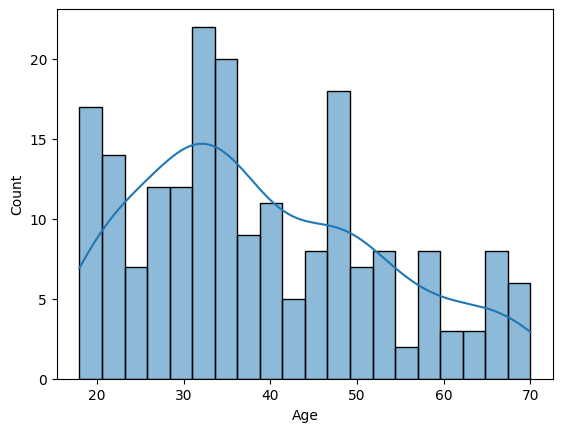

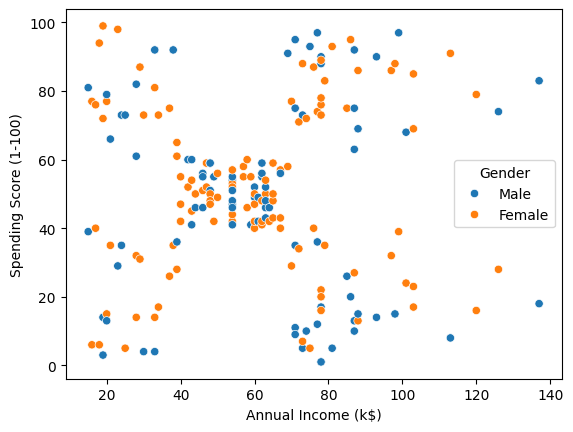

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

df = pd.read_csv("/Mall_Customers.csv")
print(df.info())
print(df.describe())

# Example EDA
sns.histplot(df["Age"], bins=20, kde=True)
plt.show()

sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.show()



**K-Means Clustering,Use Elbow Method & Silhouette Score to choose optimal k **

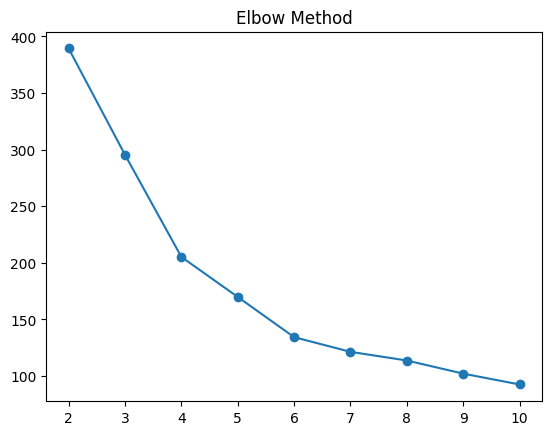

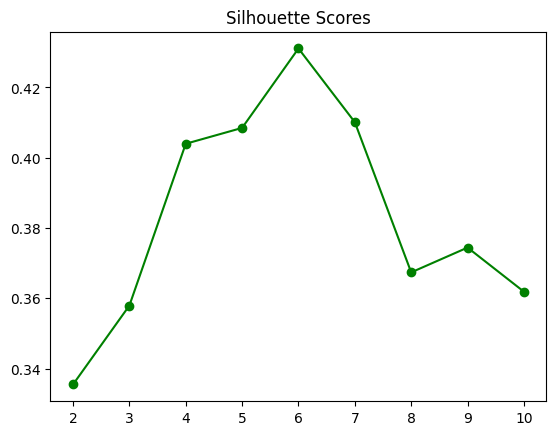

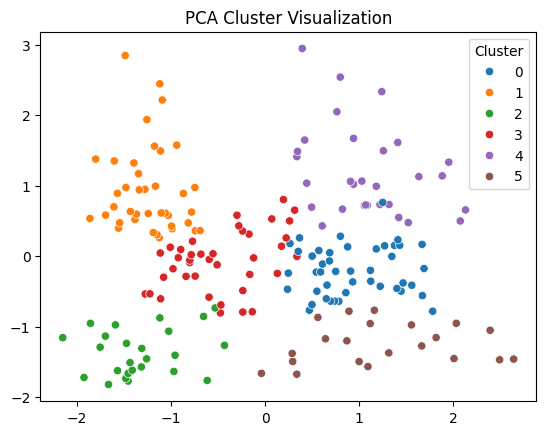

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

X = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sse, sil = [], []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, km.labels_))

# Plot elbow
plt.plot(range(2,11), sse, marker="o"); plt.title("Elbow Method"); plt.show()
# Plot silhouette
plt.plot(range(2,11), sil, marker="o", color="green"); plt.title("Silhouette Scores"); plt.show()

# Fit final model
optimal_k = sil.index(max(sil)) + 2
km_final = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto").fit(X_scaled)
df["Cluster"] = km_final.labels_

# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="tab10")
plt.title("PCA Cluster Visualization")
plt.show()


**Cluster Profiling & Marketing Strategies**

In [ ]:
profile = df.groupby("Cluster").agg({
    "Age":["mean","median"],
    "Annual Income (k$)":["mean","median"],
    "Spending Score (1-100)":["mean","median"]
})
print(profile)


               Age        Annual Income (k$)        Spending Score (1-100)  \
              mean median               mean median                   mean   
Cluster                                                                      
0        56.333333   54.0          54.266667   54.0              49.066667   
1        32.692308   32.0          86.538462   79.0              82.128205   
2        25.560000   24.0          26.480000   25.0              76.240000   
3        26.125000   25.0          59.425000   60.0              44.450000   
4        44.000000   43.5          90.133333   87.0              17.933333   
5        45.523810   46.0          26.285714   25.0              19.380952   

                
        median  
Cluster         
0         49.0  
1         83.0  
2         76.0  
3         48.0  
4         16.5  
5         15.0  
